In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = pd.read_csv('daily_dataset.csv')


columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']


data = data[columns].apply(pd.to_numeric, errors='coerce')


X = data.drop(['LCLid', 'day'], axis=1)


X.dropna(inplace=True)

print(X.head());


scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)


   energy_median  energy_mean  energy_max  energy_count  energy_std  \
0         0.4850     0.432045       0.868          22.0    0.239146   
1         0.1415     0.296167       1.116          48.0    0.281471   
2         0.1015     0.189812       0.685          48.0    0.188405   
3         0.1140     0.218979       0.676          48.0    0.202919   
4         0.1910     0.325979       0.788          48.0    0.259205   

   energy_sum  energy_min  
0       9.505       0.072  
1      14.216       0.031  
2       9.111       0.064  
3      10.511       0.065  
4      15.647       0.066  


In [ ]:
best_eps = None
best_min_samples = None
lowest_reconstruction_error = float('inf')

epsilon_values = np.linspace(0.001, 0.01, num=10)  # Adjust epsilon range
min_samples_values = range(1, 5)  # Adjust min_samples range
reconstruction_errors = []
valid_combinations = []

for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data_scaled)

        if len(np.unique(cluster_labels)) > 1:
            reconstructed_data = scaler.inverse_transform(X.values[dbscan.core_sample_indices_])
            reconstruction_error = np.mean(np.square(X.values[dbscan.core_sample_indices_] - reconstructed_data))
            reconstruction_errors.append(reconstruction_error)
            valid_combinations.append((eps, min_samples))

            if reconstruction_error < lowest_reconstruction_error:
                lowest_reconstruction_error = reconstruction_error
                best_eps = eps
                best_min_samples = min_samples


In [ ]:
# Print the best reconstruction error and corresponding epsilon and minimum samples values
print("Best Reconstruction Error: {:.4f}".format(lowest_reconstruction_error))
print("Best Epsilon: {:.2f}".format(best_eps))
print("Best Minimum Samples: {}".format(best_min_samples))


Best Reconstruction Error: 293.9355
Best Epsilon: 0.00
Best Minimum Samples: 4


In [ ]:
# Calculate data reduction percentage
original_data_size = X.shape[0] * X.shape[1]
transmitted_data_size = len(dbscan.core_sample_indices_) * X.shape[1]
data_reduction = 100 * (1 - transmitted_data_size / original_data_size)

print("Data Reduction Percentage: {:.2f}%".format(data_reduction))

Data Reduction Percentage: 96.38%


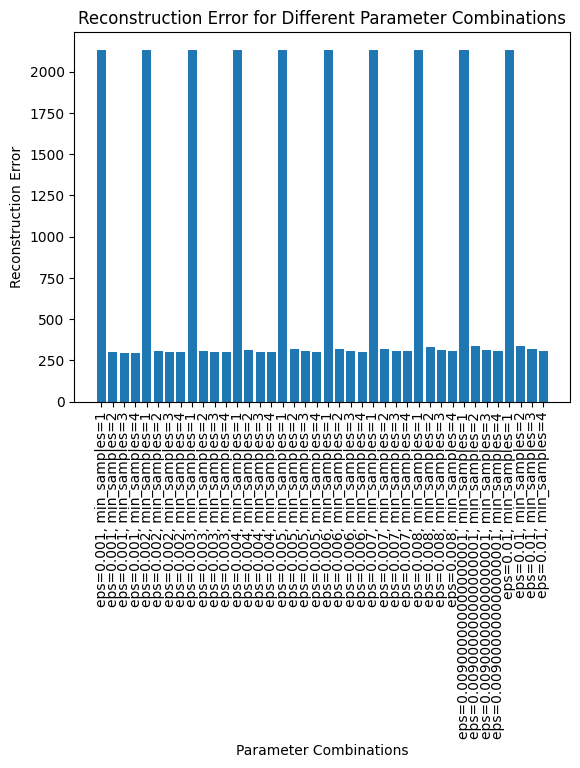

In [ ]:
plt.bar(range(len(reconstruction_errors)), reconstruction_errors)
plt.xticks(range(len(valid_combinations)), [f"eps={eps}, min_samples={min_samples}" for eps, min_samples in valid_combinations], rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Parameter Combinations')
plt.show()
